In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'transactions.csv', 'items.csv', 'oil.csv', 'holidays_events.csv', 'sample_submission.csv', 'stores.csv']


Here we first load the items into a Pandas dataframe

In [149]:
items = pd.read_csv('./data/items.csv')
items.info()
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
item_nbr      4100 non-null int64
family        4100 non-null object
class         4100 non-null int64
perishable    4100 non-null int64
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [150]:
items.perishable.value_counts()


0    3114
1     986
Name: perishable, dtype: int64

Analysis of the various items sold indicates that there are 4100 different items that are sold and of these 986 are perishable items and 3114 are Non-perishable items.

In [23]:
df_sales = pd.read_csv('./data/transactions.csv',parse_dates=True,index_col='date')
df_sales.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


In [152]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83488 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
store_nbr       83488 non-null int64
transactions    83488 non-null int64
dtypes: int64(2)
memory usage: 1.9 MB


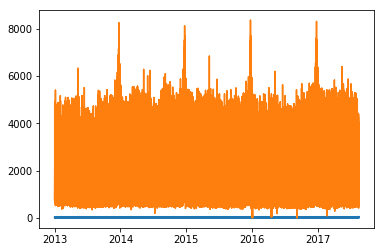

In [25]:
plt.plot(df_sales)
plt.show()

Data frame transactions (which has the data for the total number of transactions by date and store) contains the date information as an object. We first need to modify this to a date time type to let us perform timeseries analysis.

# Note: In the first approach, the data was loaded into a pandas dataframe and then the index was set to date type. Later, I modified the method to include parse_dates=True and index_col='date', to improve performance

# Visualize the sales information for one Store (Store # 54)
Here we visualize the sales information of one store to see if we can identify any patterns(sesonality, outliers) etc. 

In [153]:
store_54=df_sales[df_sales.store_nbr==54]

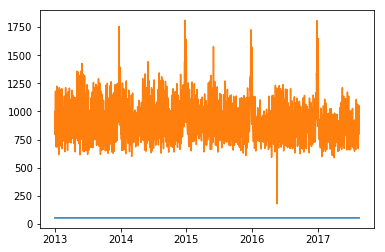

In [154]:
plt.plot(store_54)
plt.show()

By creating a Time Series graph of Sales, we find that for the most part, sales have been following a regular pattern.However in 2016, it appears that there was a drop in sales. We need to anlyze if this drop was specific to a single store or all stores were impacted by a specific event.

# Create sub-plots of sales information by stores here

Analysis of the top and bottom rows of the dataframe indicates that the data set contains sales records for 5 years ( 2013 January through 2017 August) and each record has the sale information (unit sales) at store level and item level.

In [155]:
stores = pd.read_csv('./data/stores.csv')
stores.info()
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
store_nbr    54 non-null int64
city         54 non-null object
state        54 non-null object
type         54 non-null object
cluster      54 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


First Make the type column in Stores data frame as categorical type

In [156]:
stores.type=stores.type.astype('category')

In [157]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
store_nbr    54 non-null int64
city         54 non-null object
state        54 non-null object
type         54 non-null category
cluster      54 non-null int64
dtypes: category(1), int64(2), object(2)
memory usage: 2.0+ KB


In [158]:
stores.tail(10)

,store_nbr,city,state,type,cluster
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


Analysis of the Stores data frame indicates that there are 54 stores in Ecuador across various States and Cities. As a first task let us first analyze the stores and group them by States and Cities so that we get the information about Ecuador's demographics.

In [159]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Santo Domingo     3
Cuenca            3
Manta             2
Ambato            2
Machala           2
Latacunga         2
Riobamba          1
Libertad          1
Guaranda          1
Puyo              1
Quevedo           1
Esmeraldas        1
Loja              1
Playas            1
El Carmen         1
Cayambe           1
Salinas           1
Daule             1
Ibarra            1
Babahoyo          1
Name: city, dtype: int64

In [160]:
store=stores['store_nbr']

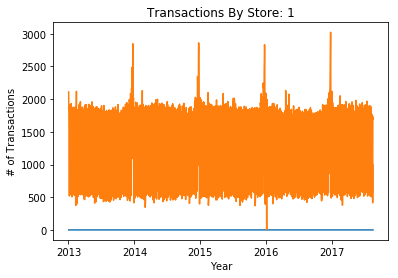

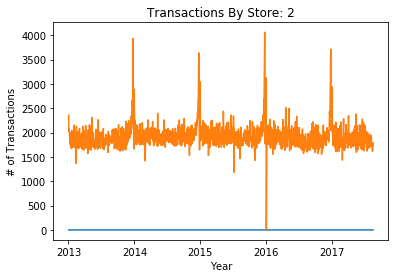

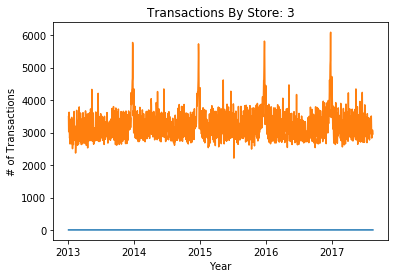

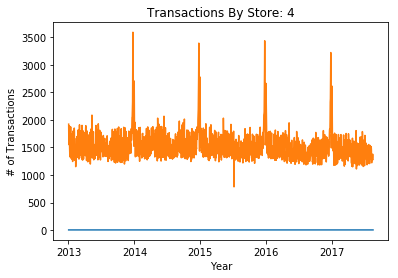

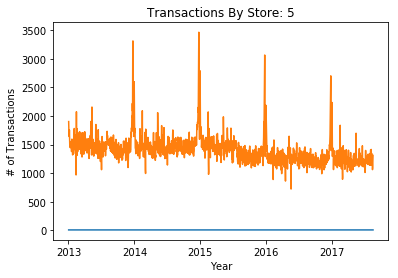

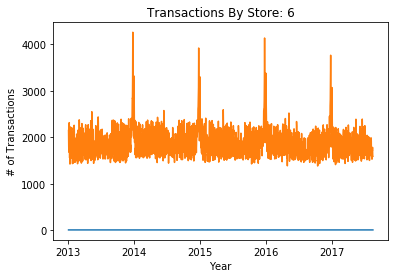

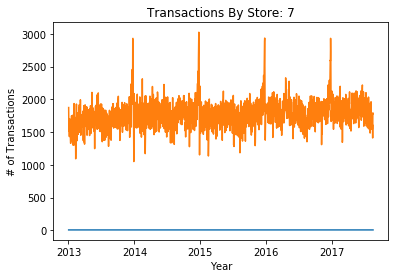

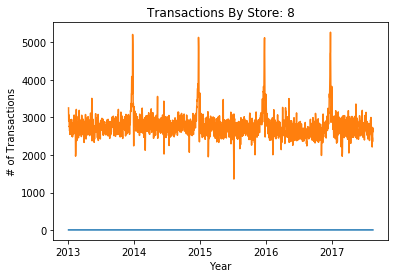

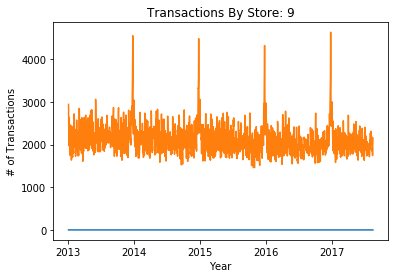

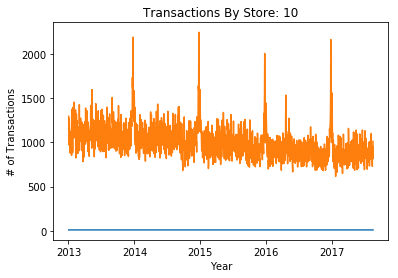

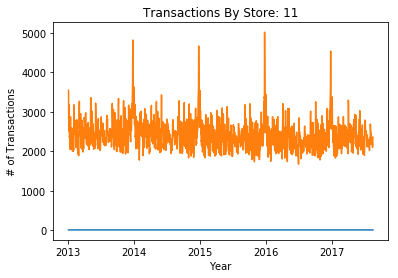

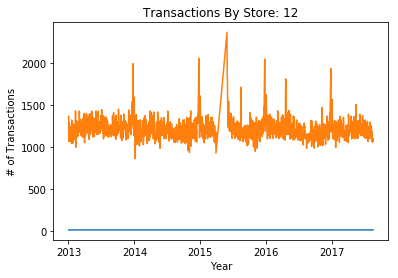

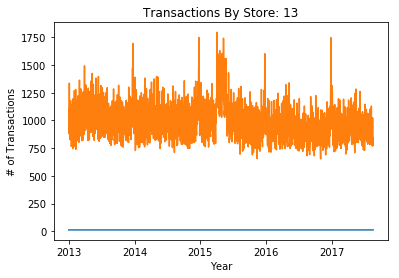

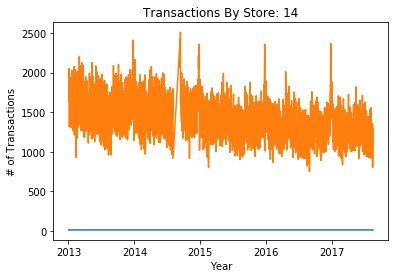

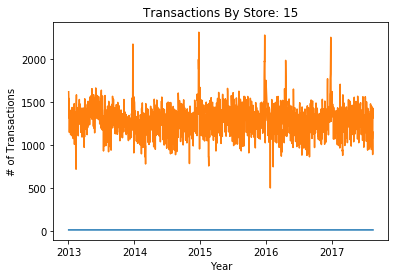

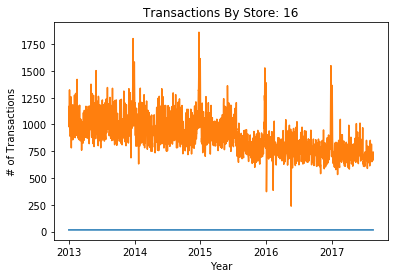

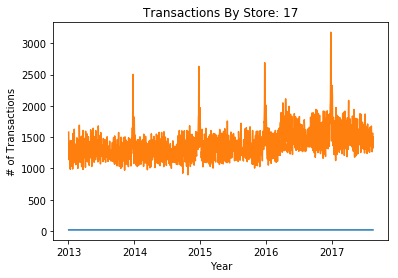

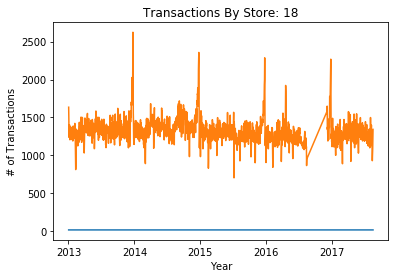

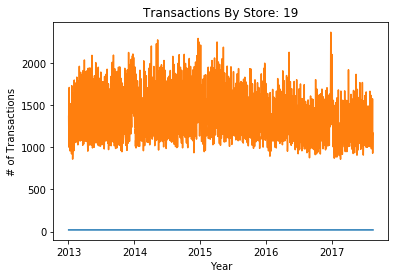

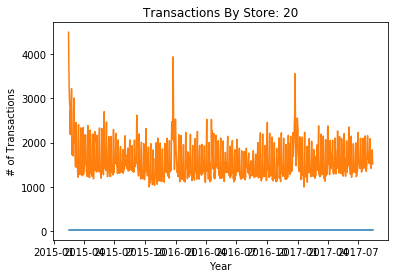

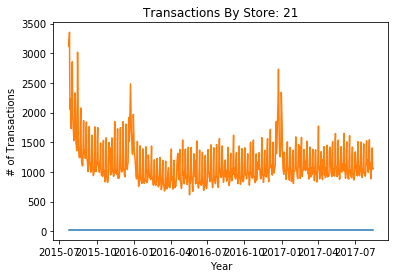

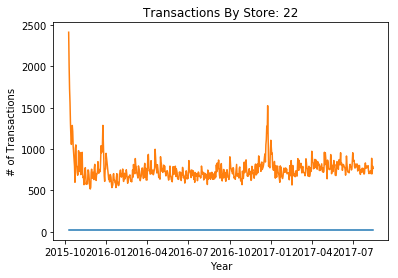

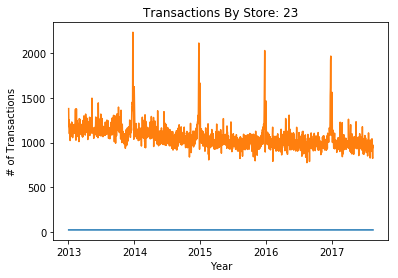

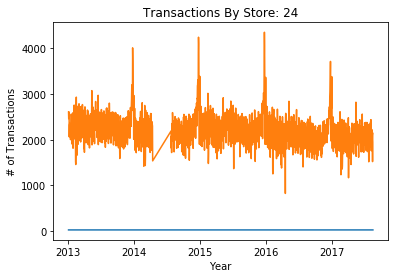

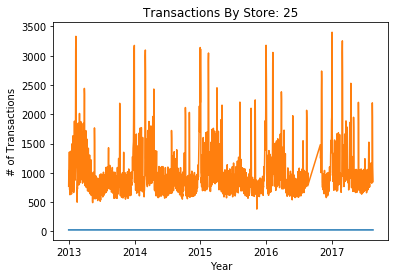

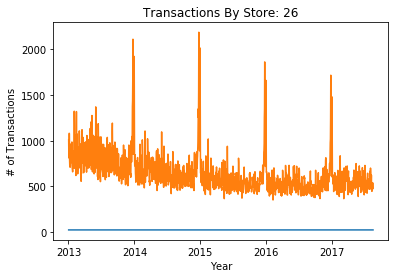

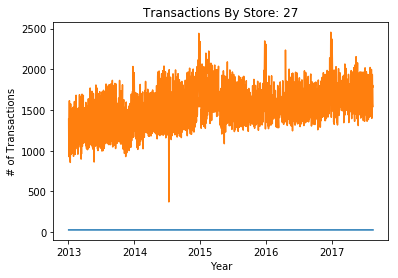

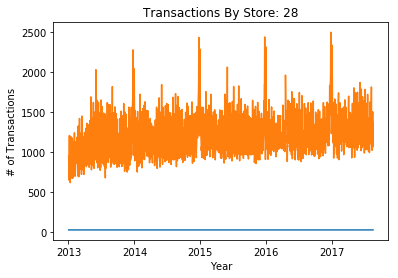

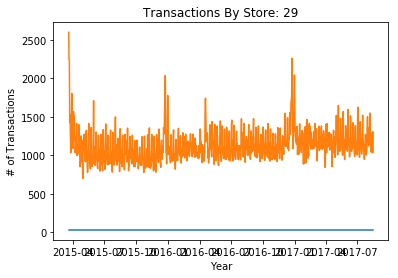

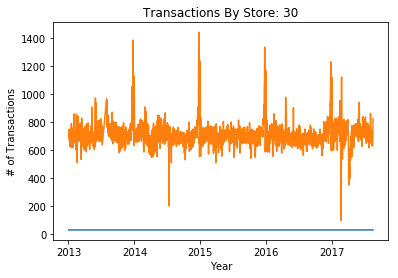

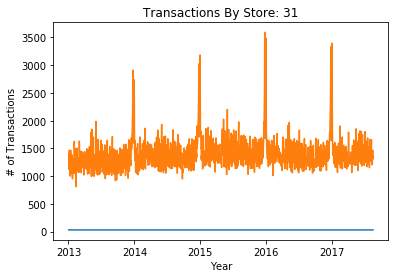

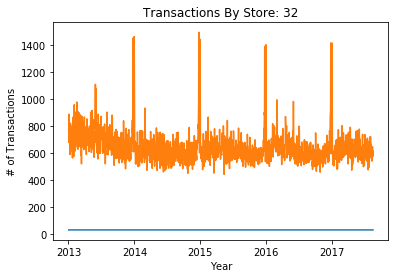

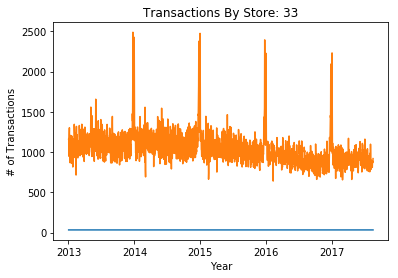

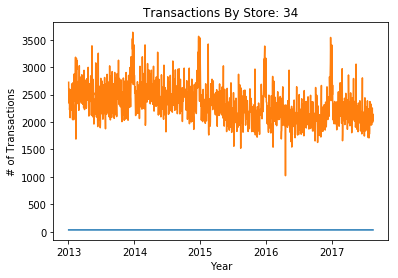

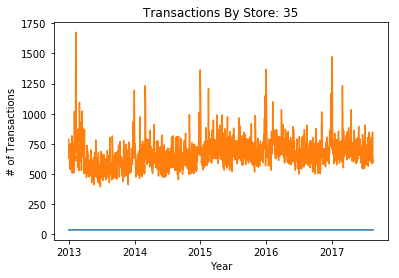

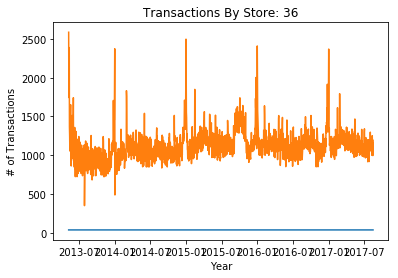

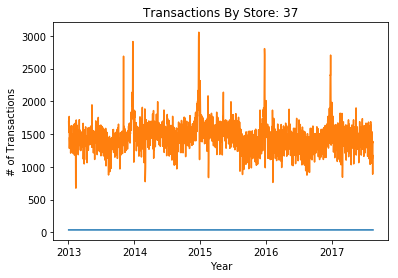

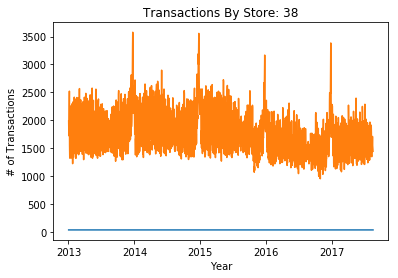

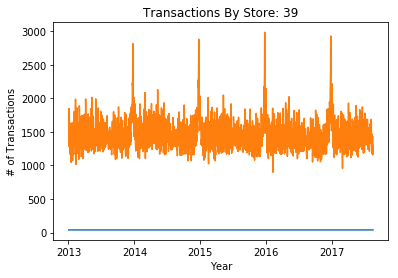

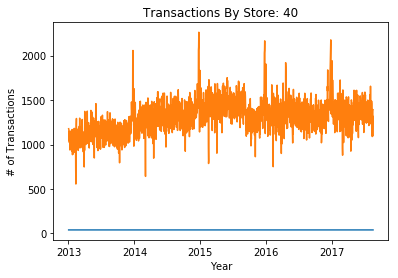

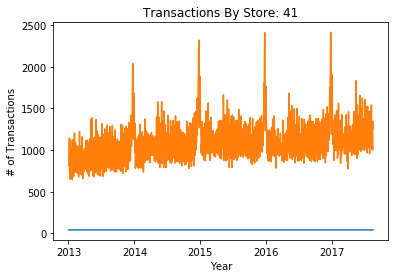

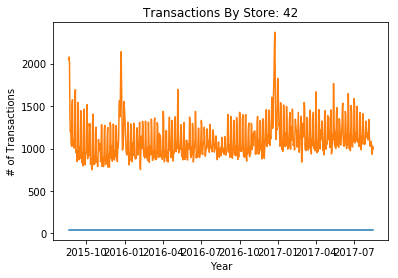

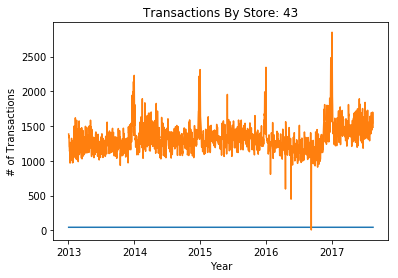

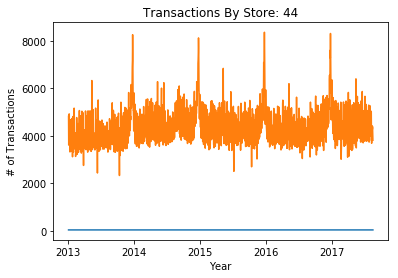

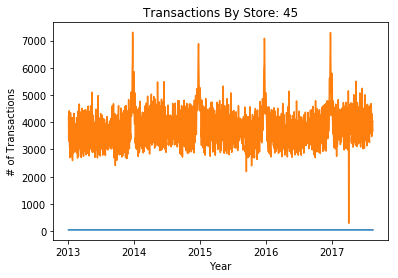

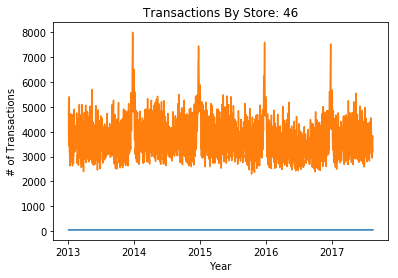

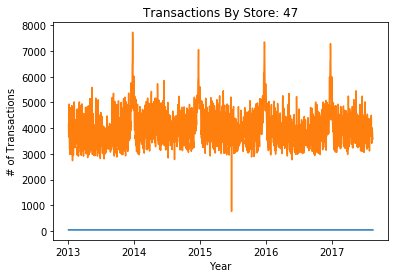

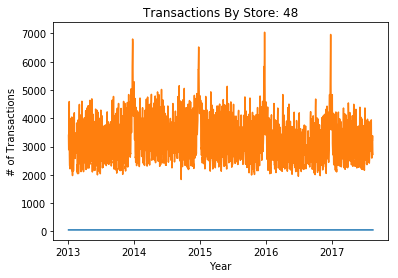

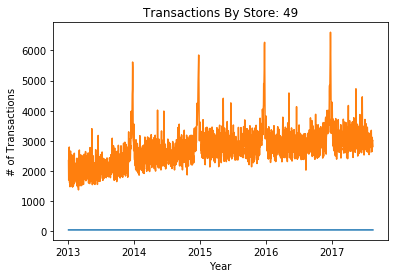

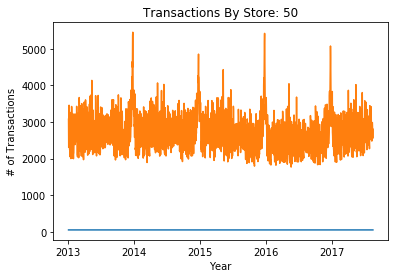

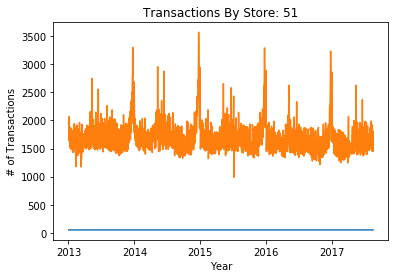

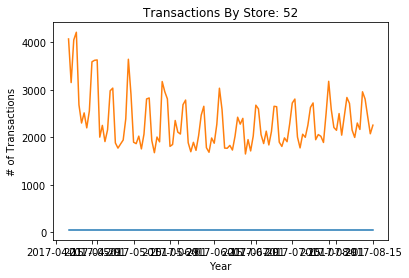

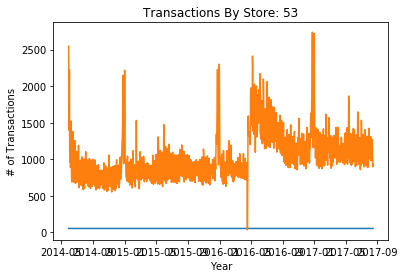

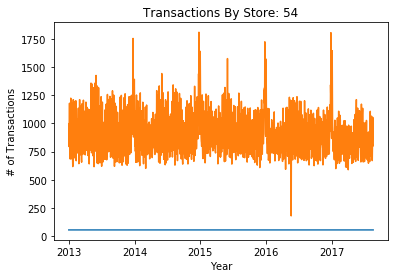

In [161]:
for nbr in store:
    store_sales = df_sales[df_sales.store_nbr==nbr]
    plt.plot(store_sales)        
    plt.title('Transactions By Store: '+str(nbr))
    plt.xlabel('Year')
    plt.ylabel('# of Transactions')
    plt.show()
            
                    
                                       
                                       

Visually when we analyze the sales trend across all 54 stores, we find that many stores had a drop in sales volume in the year 2016. Certain stores had a large variability in the sales (example Store # 25 had numerous peaks in sales vloume). Since 2016 is a year of interest, we can further analyze the sales information for the year 2016 and create visualization plots to specifically see if there are certain stores that are impacted by a drop in sales or if this ia a geo-political situation (impacting the sales of all the stores in the country).

In [162]:
sales_2016 = df_sales.loc['2016']

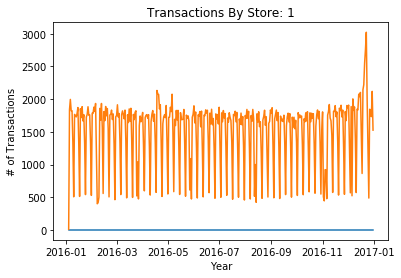

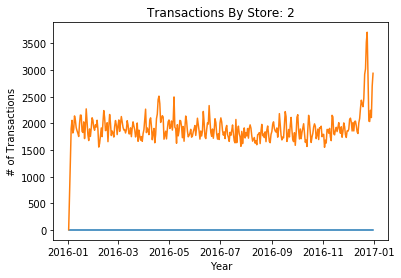

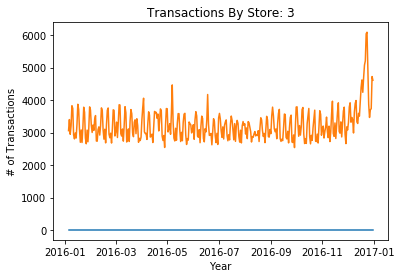

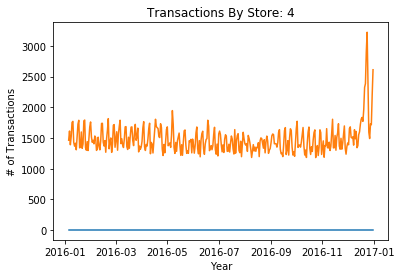

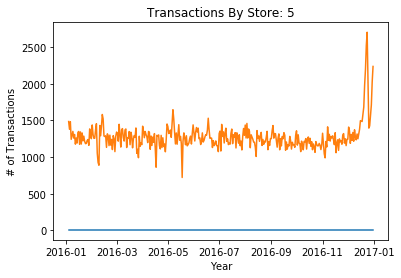

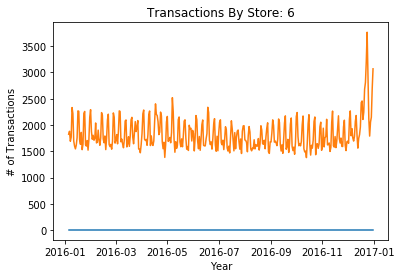

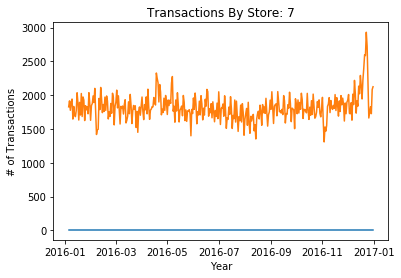

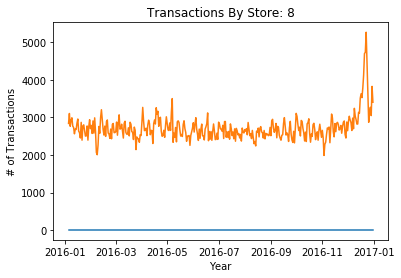

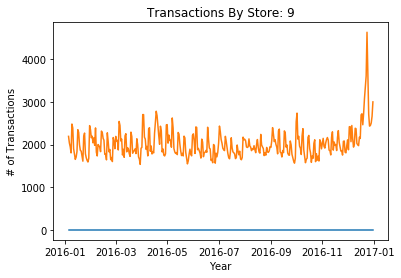

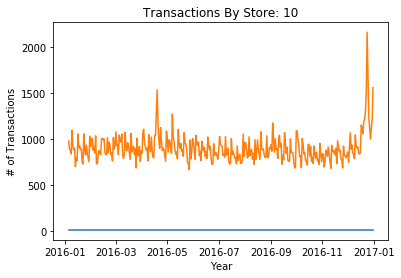

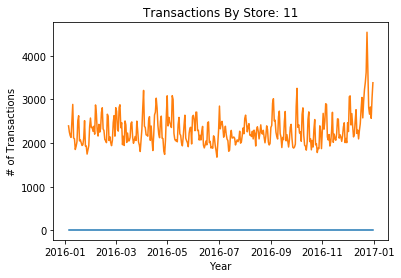

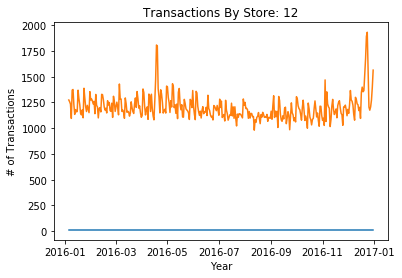

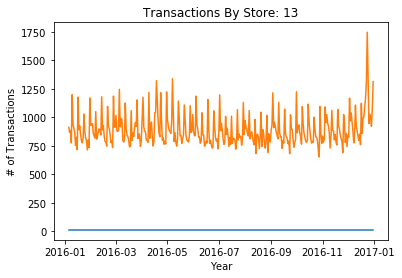

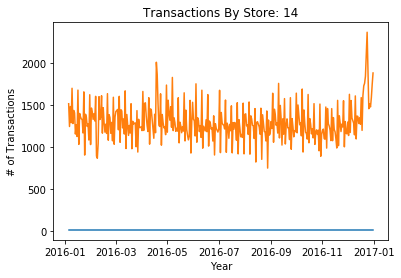

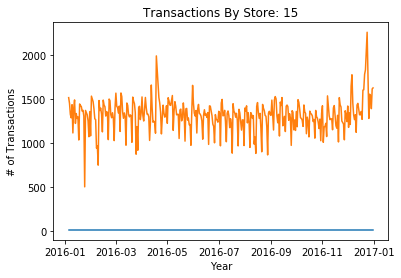

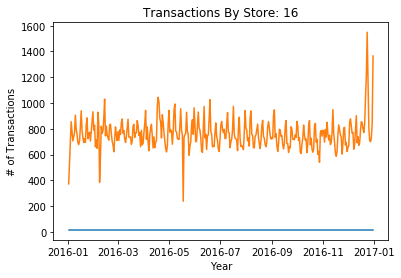

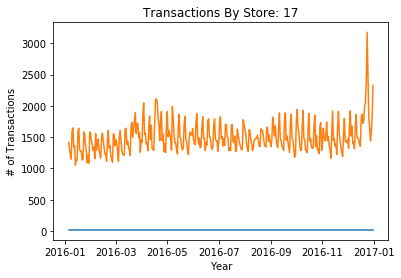

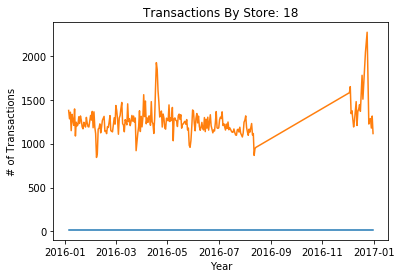

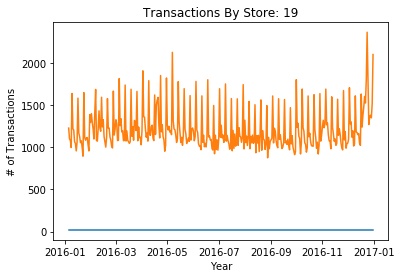

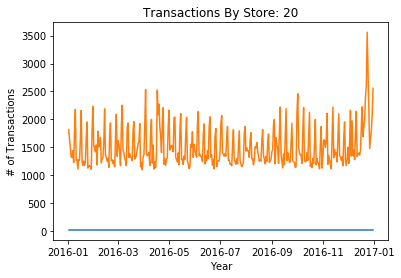

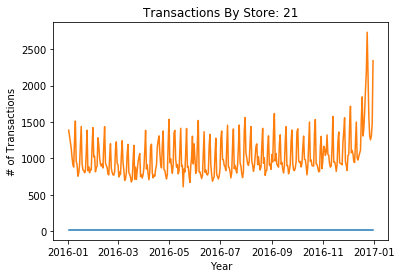

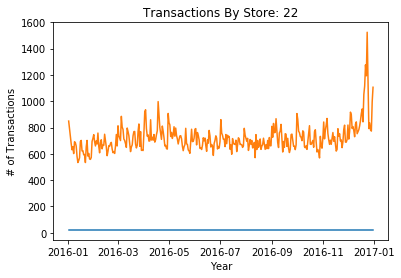

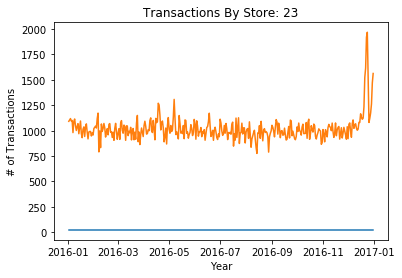

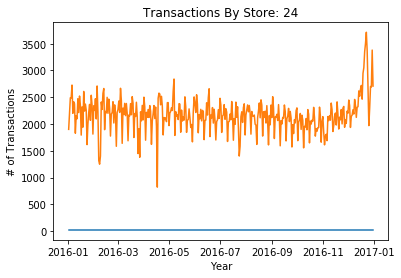

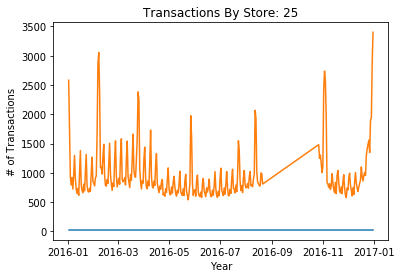

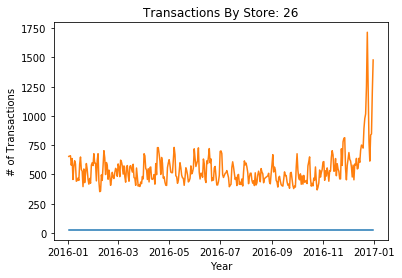

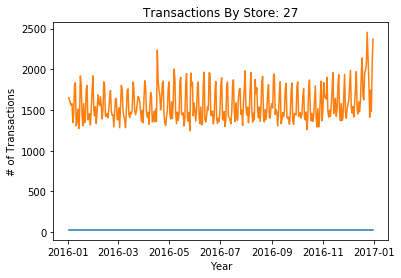

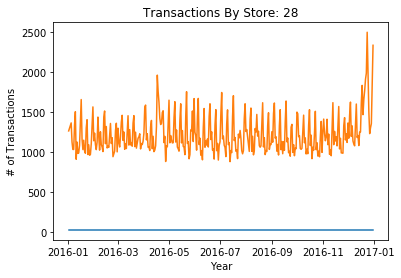

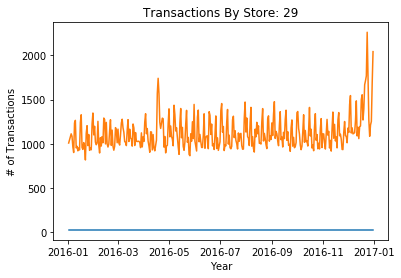

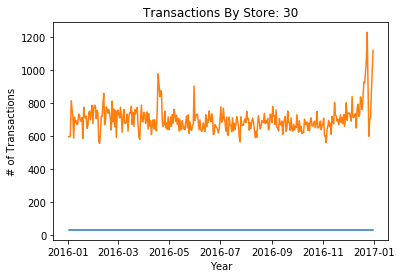

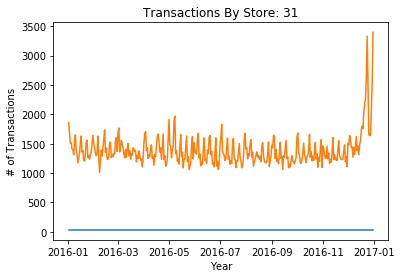

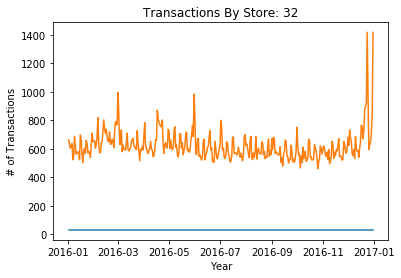

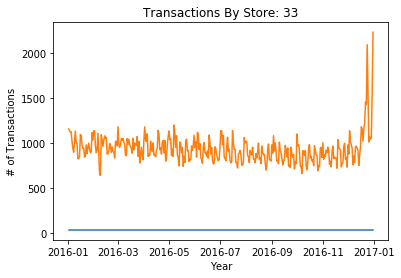

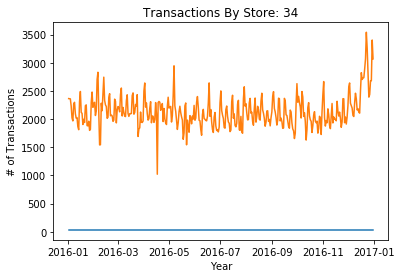

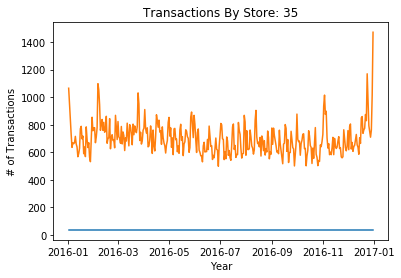

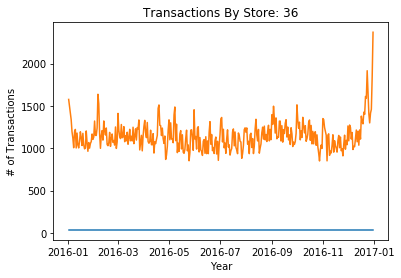

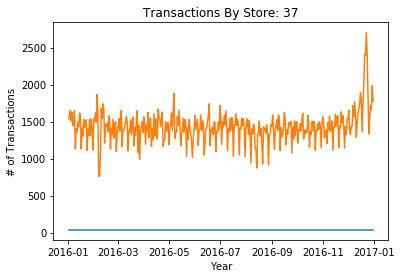

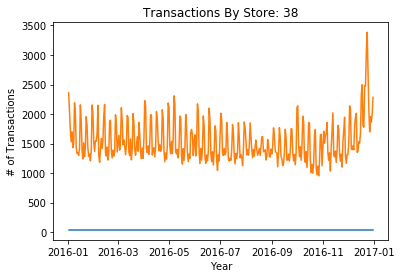

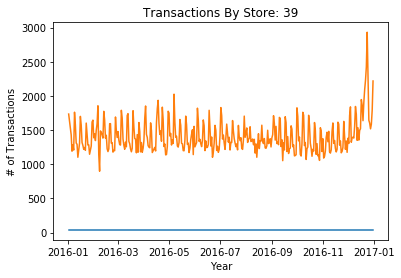

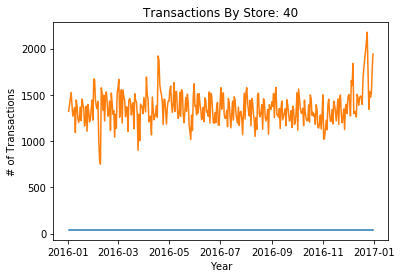

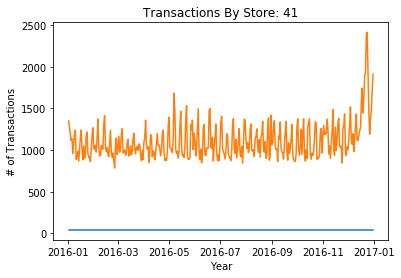

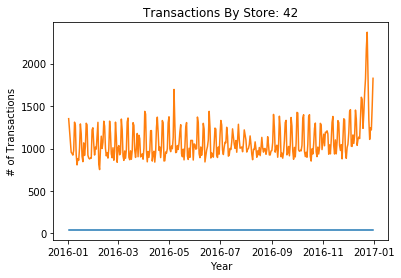

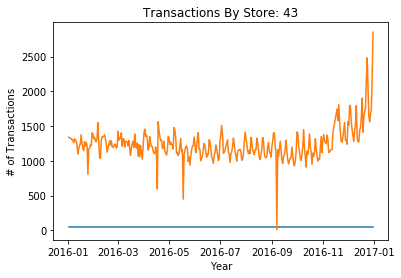

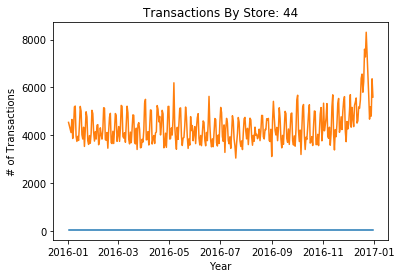

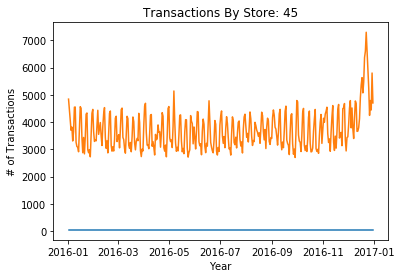

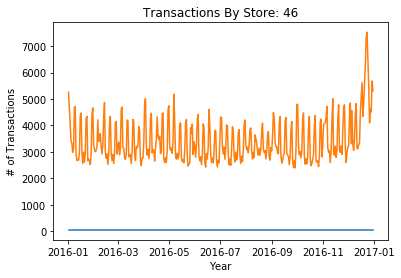

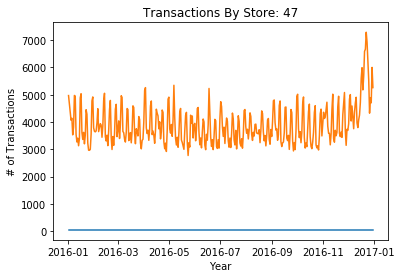

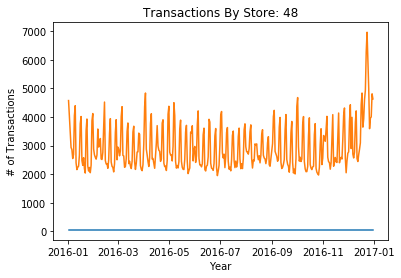

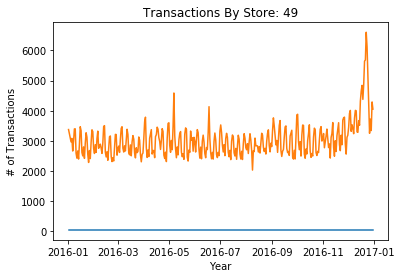

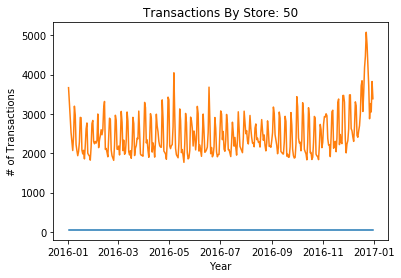

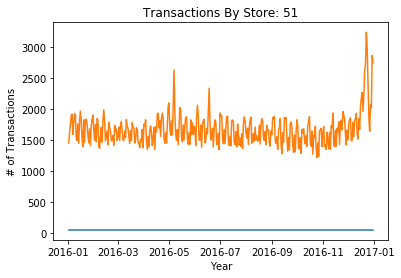

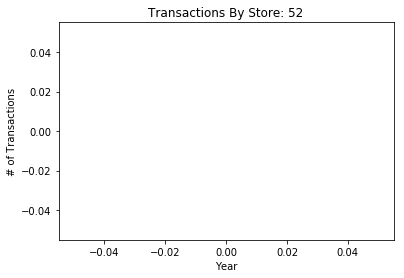

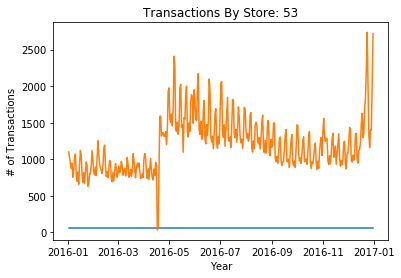

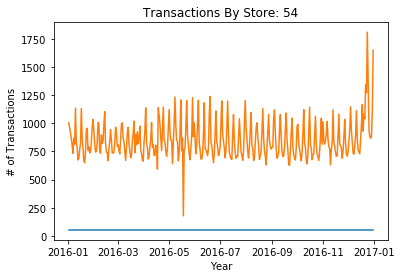

In [163]:
for nbr in store:
    store_sales = sales_2016[sales_2016.store_nbr==nbr]
    plt.plot(store_sales)        
    plt.title('Transactions By Store: '+str(nbr))
    plt.xlabel('Year')
    plt.ylabel('# of Transactions')
    plt.show()

Analysis of the Sales for the Year 2016 indicates an interesting pattern. Sales for the year 2016 are not specific to a specific season or time of the year (Example Summer). There are certain stores that are not impacted by drop in sales and one store (Store 52) has zero sales in 2016. This could indicate that Store 52 was either closed or consolidated.

# Analysis of Store 52 -
In order to analayze Store 52, we first aggregate the sales for this store by their year and create an histogram of the aggregated sales to see if the data supports our premise that this store was closed after 2016.

In [164]:
store_52 = df_sales[df_sales.store_nbr==52]

In [165]:
store_52.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2017-04-20 to 2017-08-15
Data columns (total 2 columns):
store_nbr       118 non-null int64
transactions    118 non-null int64
dtypes: int64(2)
memory usage: 2.8 KB


In [166]:
store_52.head()

,store_nbr,transactions
date,,
2017-04-20,52,4068
2017-04-21,52,3151
2017-04-22,52,4046
2017-04-23,52,4209
2017-04-24,52,2682


In [167]:
store_52.tail()

,store_nbr,transactions
date,,
2017-08-11,52,2957
2017-08-12,52,2804
2017-08-13,52,2433
2017-08-14,52,2074
2017-08-15,52,2255


In [168]:
store_52['transactions'].resample('M').sum()

date
2017-04-30    34927
2017-05-31    72057
2017-06-30    62776
2017-07-31    69815
2017-08-31    35818
Freq: M, Name: transactions, dtype: int64

By analyzing the store 52 information we find that this was a new store that was possibly opened in April 2017, which explains that the sales for 2016 was zero.

# Look for trends in average transactions (sales) by stores

In [169]:
 df_sales['transactions'].resample('A').sum()

date
2013-12-31    29107173
2014-12-31    30006929
2015-12-31    31312370
2016-12-31    31052337
2017-12-31    20000136
Freq: A-DEC, Name: transactions, dtype: int64

In [33]:
avg_sales_by_store =df_sales.groupby('store_nbr')['transactions'].mean()

# Histogram of Average Transactions/Sales by Store

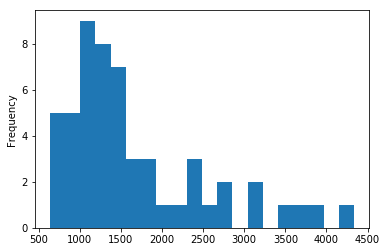

In [34]:
avg_sales_by_store.plot(kind='hist',bins=20)
plt.show()